In [1]:
%matplotlib inline

import pandas as pd

# Cargar

### Datos sobre Foursquare checkins en NYC, descargados desde [la página de Dingqi Yang](https://sites.google.com/site/yangdingqi/home/foursquare-dataset)

In [2]:
data = pd.read_table('dataset_ubicomp2013_checkins.txt', delim_whitespace=True,header=None,names=['user_id','venue_id'])

In [3]:
data.head(7)

,user_id,venue_id
0,35443,899
1,24973,42406
2,14860,177
3,222505,177
4,63524,609


In [4]:
data['user_id'].unique #usuarios unicos existen

<bound method Series.unique of 0         35443
1         24973
2         14860
3        222505
4         63524
5         51957
6          7860
7          8952
8         42283
9         14506
10       121273
11        25624
12        31594
13        23264
14        58758
15         7128
16        93642
17        47596
18        59796
19        60062
20        60486
21       130096
22       109481
23       186359
24        69593
25       133092
26        12246
27        13173
28        16474
29        73976
          ...  
27119    237070
27120    195601
27121     77298
27122     66227
27123     44226
27124      4407
27125    254301
27126     48072
27127     28938
27128     17726
27129     86038
27130     49702
27131     25152
27132    104310
27133     38456
27134     59284
27135    146757
27136     25152
27137     61109
27138     30961
27139     17516
27140     66227
27141    173878
27142    146757
27143     25662
27144      2358
27145     81275
27146     67881
27147     71476
27148    

In [5]:
lenUser = len(data['user_id'].unique()) #Cantidad de usuarios existen
print("La cantidad de usuarios unicos es {}".format(lenUser))

La cantidad de usuarios unicos es 2060


In [6]:
data['checkin'] = 1

In [7]:
my_list = [1, 1, 1, 2, 3]

In [8]:
set(my_list)

{1, 2, 3}

In [9]:
data.shape #Dimensiones de la matrix

(27149, 3)

In [10]:
data.groupby(['user_id', 'venue_id']).count().sort_values('checkin', ascending=False)
#Verificar los duplicados en orden descendente

,,checkin
user_id,venue_id,
51957,435580,149
51445,64971,92
17238,9209,86
8952,39242,74
133970,41096,73
39836,15743,72
38456,7999,69
59959,5222,63
17238,82634,55


In [11]:
data = data.drop_duplicates() #Eliminando los duplicados, ya que no sriven en este caso

In [12]:
data.shape

(13472, 3)

# Transformar

In [13]:
data.head()

,user_id,venue_id,checkin
0,35443,899,1
1,24973,42406,1
2,14860,177,1
3,222505,177,1
4,63524,609,1


In [14]:
len(set(data['user_id']))

2060

In [15]:
len(set(data['venue_id']))

2876

In [16]:
#Matrix de nxn para representar los elementos graficamente(2876x2060)
checkins_matrix = data.reset_index()\
    .pivot(index='venue_id', columns='user_id', values='checkin')\
    .fillna(0)\
    .astype(int)

In [17]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
checkins_matrix.shape 

(2876, 2060)

In [19]:
checkins_matrix.sum(axis=1) #Cuantos checkins tengo por cada lugar(por cada fila)

venue_id
15          1
20         20
25         29
26          2
36         10
39          2
40          4
42          8
46         16
47         14
52          2
59          2
77          6
78          4
83          4
86          6
88          2
98          3
99          2
102         1
105        10
114         8
115         9
123        12
133         3
138         6
141         2
142         7
148         5
154         2
           ..
1170409     1
1210157     2
1225401     1
1283376     6
1285202     1
1337942     1
1443163     2
1450342     5
1598475     2
1654176     4
1719875     1
1742184     1
1760748    16
1782104     5
1809245     2
1930899     1
1930905     1
1944209     1
1945122     1
1948043     4
1995366     4
2053266     1
2067414     2
2133943     1
2154515     5
2167106     1
2232344     1
2302016     1
2376156     1
2422200     1
dtype: int64

# Visualizar

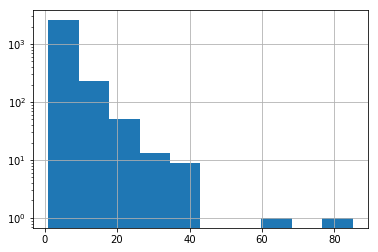

In [20]:
checkins_matrix.sum(1).hist(log=True) 
#Histogram el log permite visualizar en terminos de orden de magnitud
#AxisX(Cantidad de visitas(Checkins unicos)) && AxisY(Cantidad lugares)
#Se puede inferir entonces que han sido visitados por entre 0 y 10 personas
#Alrededor de 10^3 lugares

# Computar similaridades

###### El índice de Jaccard ( IJ ) o coeficiente de Jaccard ( IJ ) mide el grado de similitud entre dos conjuntos, sea cual sea el tipo de elementos.
La formulación es la siguiente:
###### J(A,B) = |A ∩ B| / |A ∪ B|

Es decir, la cardinalidad de la intersección de ambos conjuntos dividida por la cardinalidad de su unión.

Siempre toma valores entre 0 y 1, correspondiente este último a la igualdad total entre ambos conjuntos.

In [21]:
venue_1 = {1, 2, 4} #Conjunto 1

In [22]:
venue_2 = {3, 2, 4} #Conjunto 2

In [23]:
intersection = venue_1.intersection(venue_2) #Interseccion
intersection

{2, 4}

In [24]:
len(intersection) #Tamaño de la interseccion

2

In [25]:
union = venue_1.union(venue_2) #union
union

{1, 2, 3, 4}

In [26]:
len(union) #tamaño de la union

4

In [27]:
len(intersection) / len(union)
#Indice de Jaccard (tamaño de la interseccion divido el tamaño de la union)
#son un 50% similares


0.5

In [28]:
#Funcion para determinar el indice de Jaccard entre dos filas ingresadas
def jaccard_similarity(venue_1, venue_2):
    venue_1_user_indices = set( venue_1[venue_1 > 0].index ) 
    #Vuelve conjunto todos los elementos del row excepto 
    #la posicion 0 que es el nombre de el lugar
    venue_2_user_indices = set( venue_2[venue_2 > 0].index )
    intersection_length = len(venue_1_user_indices.intersection(venue_2_user_indices))
    #Tamaño de la interseccion y de la Union
    union_length = len(venue_1_user_indices.union(venue_2_user_indices))
    
    #Returna la division de la interseccion entre la union
    return intersection_length / union_length

In [29]:
#Funcion para determinar el indice de Jaccard
#de una fila ingresada contra todas las demas filas
def compute_pairwise_jaccard_similarities(query_venue_index):
    query_venue = checkins_matrix.ix[query_venue_index] 
    #Busca y asigna el row ingrsado a una variable
    candidate_venues = checkins_matrix.drop(query_venue_index, axis=0)
    #Escoje los candidatos contra los que se compara, 
    #eliminando el ingresado, y la columna 0 que son los nombres de los lugares
    #O la numeracion, no recuerdo :v
    similarities = {} #Se crea un diccionario vacio
    
    for candidate_venue_id, candidate_venue in candidate_venues.iterrows():
        #Se itera atravez de los items de las filas de los candidatos y se recoje 
        #su id y el valor
        similarity = jaccard_similarity(query_venue, candidate_venue)
        #Se aplica la funcion de Jaccard
        similarities[candidate_venue_id] = similarity
        #Se ingresa el valor obtenido en la anterior funcion a el diccionario
        
    return pd.Series(similarities)
    #Returna un objeto del tipo series

# Recomendar

In [ ]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
while True:
    #Solo regresa las primeras 5 con mayor similitud y en orden descendente
    try:
        query_venue_index = int( input('Please enter a query venue index: ') )
        print ("""
Estos son los 5 lugares que mas han visitado las personas que ya ha visitado el lugar que ingresaste, 
Escala:
0.000000: ninguna similaridad
1.000000: Total similaridad
talvez te interesen:
        """)
        print( compute_pairwise_jaccard_similarities(query_venue_index).sort_values(ascending=False).head(5) )
    except:
        pass

Please enter a query venue index: 15

Estos son los 5 lugares que mas han visitado las personas que ya ha visitado el lugar que ingresaste, 
Escala:
0: ninguna similaridad
1: Total similaridad
talvez te interesen:
        
119774    0.333333
43052     0.333333
19700     0.111111
11536     0.000000
11678     0.000000
dtype: float64
